In [100]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

In [101]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375


In [102]:
# copy to a new dataframe
df_gdp = dfLE.copy()
df_gdp.head(10)

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.3750,92.3750,6998.575103,2.012120e+07,16.50625
6,Armenia,0.0,73.40000,117.3750,1.0000,3.702667,87.562500,274.2500,44.70625,1.0000,89.1250,87.3750,1999.986318,1.015165e+06,11.78750
7,Australia,1.0,81.81250,63.1875,1.0000,10.155333,93.400000,103.9375,55.86250,1.3750,86.7500,86.8750,34637.565047,4.587010e+06,20.03750
8,Austria,1.0,81.48125,65.7500,0.0000,12.236000,81.062500,77.2500,48.28750,0.0000,86.0000,86.7500,33827.476309,6.474880e+06,15.38750
9,Azerbaijan,0.0,70.73125,115.1875,6.0625,0.992000,59.214286,598.1875,43.84375,7.1875,75.8125,82.3125,3302.947807,2.157370e+06,11.35000


In [103]:
#Part 1
df_gdp['GDP_capita'] = df_gdp['GDP'] / df_gdp['Population']
df_gdp['GDP_capita'].sample(10)

59     0.007234
30     0.002586
42     0.035613
165    0.009701
149    0.001018
159    0.000644
21     0.004228
45          NaN
54     0.014193
85     0.000372
Name: GDP_capita, dtype: float64

In [104]:
# try use population / gdp

df_gdp['GDP_capita2'] = df_gdp['GDP'] / (df_gdp['Population'] - df_gdp['Schooling'])
df_gdp['GDP_capita2'].sample(10)

9      0.001531
76     0.000002
24     0.000933
7      0.007551
28     0.000065
54     0.014194
102    1.149311
41          NaN
183    0.003001
95     0.000088
Name: GDP_capita2, dtype: float64

In [105]:
df_gdp['GDP_capita2'].head(5)

0    0.000034
1    0.003042
2    0.000132
3    0.000195
4         NaN
Name: GDP_capita2, dtype: float64

In [106]:
df_gdp.head(5)

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_capita,GDP_capita2
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250,0.000034,0.000034
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750,0.003042,0.003042
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250,0.000132,0.000132
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375,0.000195,0.000195
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375,NaN,NaN


In [107]:
GDP_capita_final = df_gdp['GDP_capita2']

In [108]:
GDP_capita_final = GDP_capita_final.apply(lambda x:x * 1000000)
GDP_capita_final


0        34.096154
1      3041.653376
2       131.541698
3       194.651158
4              NaN
          ...     
186            NaN
187            NaN
188            NaN
189     129.677530
190      51.235896
Name: GDP_capita2, Length: 191, dtype: float64

In [109]:
GDP_capita_final = GDP_capita_final.dropna()

In [110]:
# delete all NaN data in GDP_capita column.
df_gdp = df_gdp.dropna()
df_gdp.describe()

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_capita,GDP_capita2
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,1.330000e+02,133.000000,133.000000,133.000000
mean,0.142857,68.139709,174.300282,35.902726,4.436893,77.272061,2657.467105,36.691964,49.817199,80.572006,80.699919,5408.637801,1.340066e+07,11.691823,0.022096,0.022133
std,0.351250,9.254200,97.065845,133.819254,3.736886,17.174868,8473.612218,15.971021,181.414641,15.732438,16.431339,8750.957195,3.972571e+07,3.006460,0.117543,0.117863
min,0.000000,46.112500,18.750000,0.000000,0.010000,9.000000,0.000000,12.875000,0.000000,32.875000,26.812500,137.815321,3.334250e+03,4.018750,0.000002,0.000002
25%,0.000000,60.862500,114.312500,0.687500,1.074667,66.500000,15.125000,19.293750,1.000000,69.625000,70.500000,716.770068,1.007302e+06,9.868750,0.000110,0.000110
50%,0.000000,70.731250,154.312500,3.312500,3.807333,79.600000,251.937500,39.743750,4.000000,84.375000,84.500000,2158.280869,3.735507e+06,12.000000,0.000628,0.000628
75%,0.000000,74.262500,227.750000,23.250000,7.130000,91.812500,1880.812500,50.893750,35.562500,94.812500,95.000000,5179.256189,1.124072e+07,13.725000,0.004676,0.004676
max,1.000000,82.518750,550.062500,1366.687500,13.497333,98.875000,65857.937500,69.431250,1812.500000,98.562500,98.937500,53257.012741,4.214677e+08,20.037500,1.145174,1.149311


In [111]:
GDP_capita_final.head()

0      34.096154
1    3041.653376
2     131.541698
3     194.651158
5     347.821168
Name: GDP_capita2, dtype: float64

In [112]:
hist_gdp = thinkstats2.Hist(df_gdp['GDP_capita'], label = 'GDP_capita')

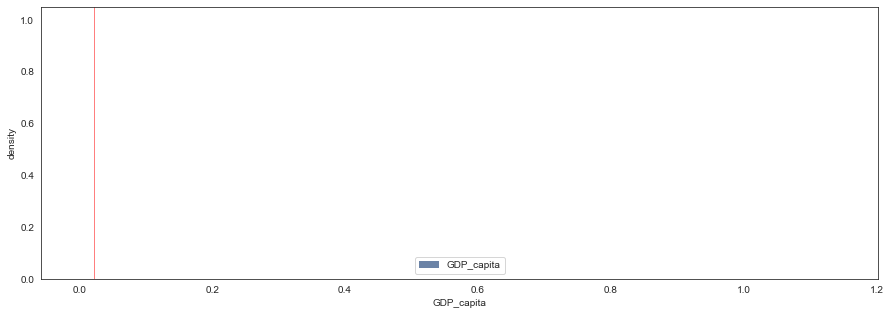

In [113]:
thinkplot.Hist(hist_gdp)
thinkplot.Config(xlabel='GDP_capita', ylabel='density')
thinkplot.axvline(np.mean(hist_gdp), color="red")

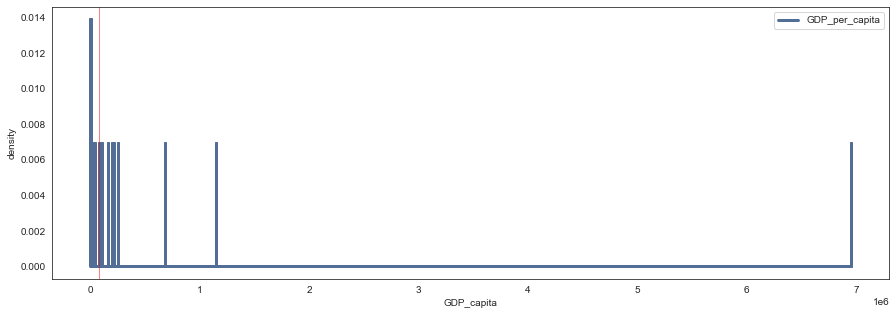

In [114]:
pmf_gdp = thinkstats2.Pmf(round(GDP_capita_final)-3, label = 'GDP_per_capita')

thinkplot.Pmf(pmf_gdp)
thinkplot.Config(xlabel='GDP_capita', ylabel='density')
thinkplot.axvline(np.mean(pmf_gdp), color="red")

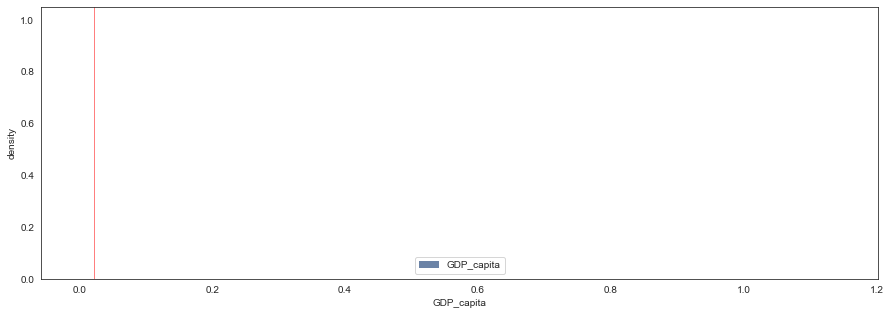

In [115]:
thinkplot.Hist(hist_gdp)
thinkplot.Config(xlabel='GDP_capita', ylabel='density')
thinkplot.axvline(np.mean(hist_gdp), color="red")

0    0.000034
1    0.003042
2    0.000132
3    0.000195
5    0.000348
Name: GDP_capita2, dtype: float64

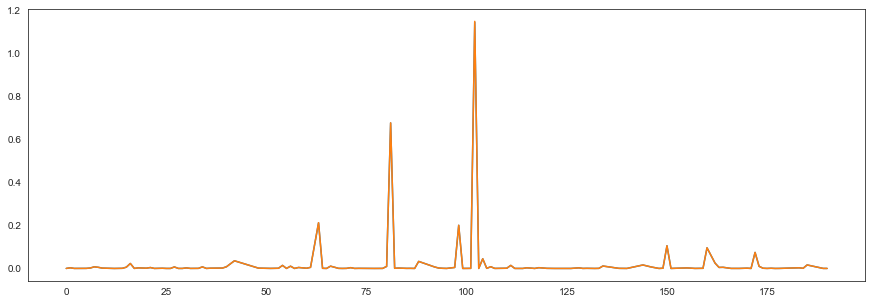

In [116]:
# now this GDP_capita data has some unusual data.
GDP_capita_final = df_gdp['GDP_capita']
GDP_capita_final = GDP_capita_final.apply(lambda x:x * 1000000)
GDP_capita_final

plt.plot(df_gdp['GDP_capita'])
df_gdp['GDP_capita'].head(5)



plt.plot(df_gdp['GDP_capita2'])
df_gdp['GDP_capita2'].head(5)

In [117]:
#Print all distributions
# create a function for all distributions
def all_graphs(df_name, column_name):
    data = pd.Series(df_name[column_name])
    hist = thinkstats2.Hist(data) 
    pmf = thinkstats2.Pmf(data) 
    cdf = thinkstats2.Cdf(data)
    pdf = thinkstats2.EstimatedPdf(data)
    thinkplot.PrePlot(6, rows = 2, cols = 3) 
    thinkplot.Hist(hist) 
    thinkplot.SubPlot(2) 
    thinkplot.Pmf(pmf) 
    thinkplot.SubPlot(3)
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4)
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5)
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6)
    thinkplot.Pdf(pdf)
    thinkplot.Config()
    return

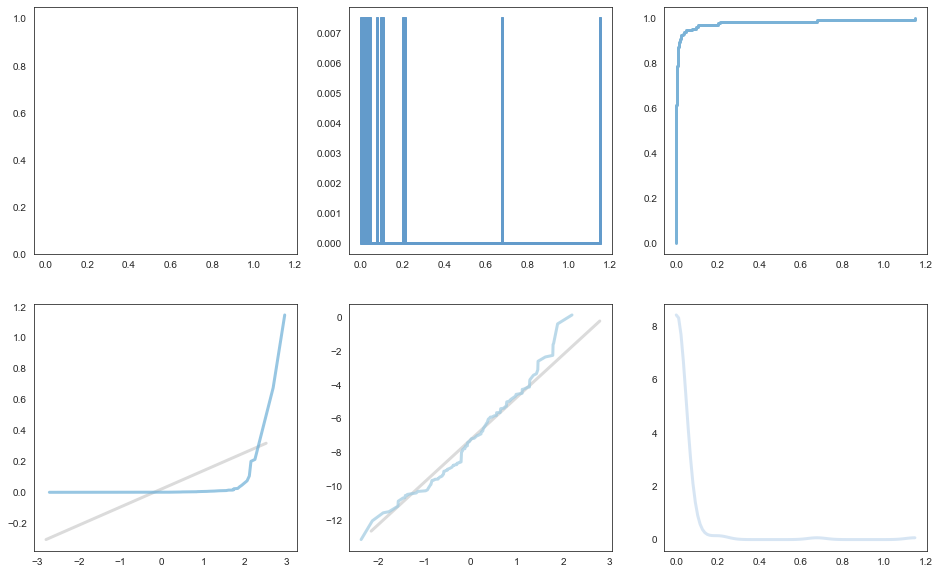

In [118]:
#graphing
all_graphs(df_gdp,'GDP_capita2')

In [119]:
#Print all distributions
# create a function for all distributions

def all_graphs(df_name, column_name):
    data = pd.Series(df_name[column_name])
    hist = thinkstats2.Hist(data) 
    pmf = thinkstats2.Pmf(data) 
    cdf = thinkstats2.Cdf(data)
    pdf = thinkstats2.EstimatedPdf(data)
    thinkplot.PrePlot(6, rows = 2, cols = 3) 
    thinkplot.Hist(hist) 
    thinkplot.SubPlot(2) 
    thinkplot.Pmf(pmf) 
    thinkplot.SubPlot(3)
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4)
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5)
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6)
    thinkplot.Pdf(pdf)
    thinkplot.Config()
    return

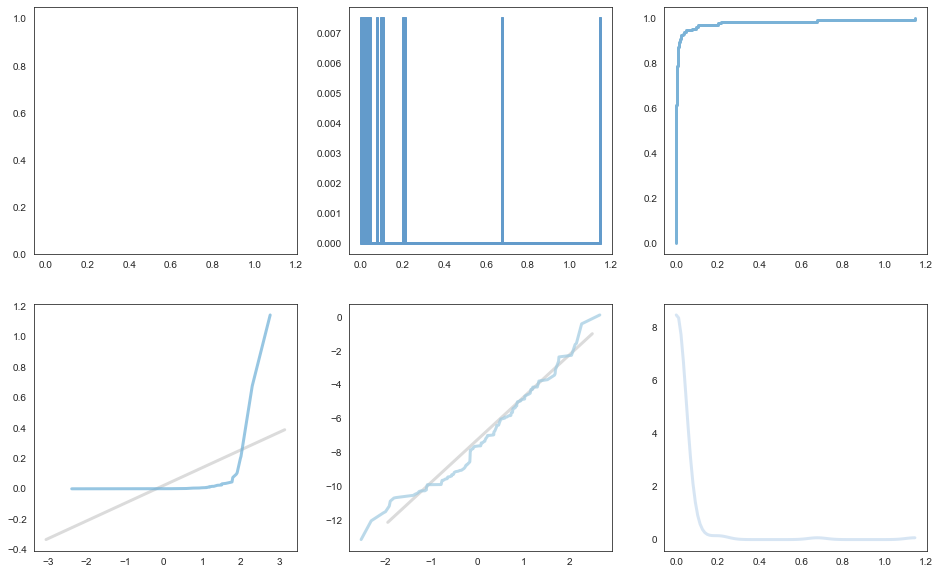

In [120]:
#graphing
all_graphs(df_gdp,'GDP_capita')

<AxesSubplot:ylabel='Density'>

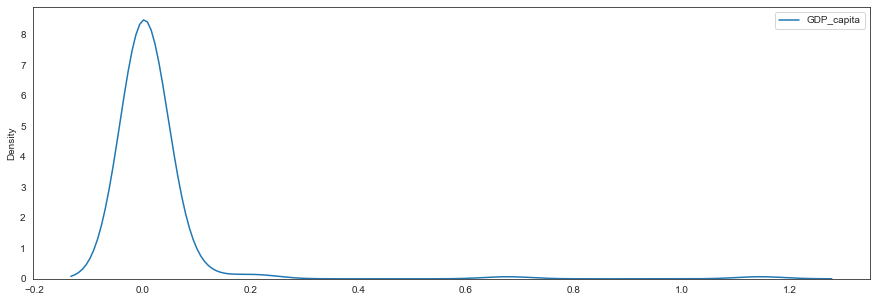

In [121]:
kde_capita = df_gdp[['GDP_capita']]
sns.kdeplot(data = kde_capita)


{'xscale': 'linear', 'yscale': 'linear'}

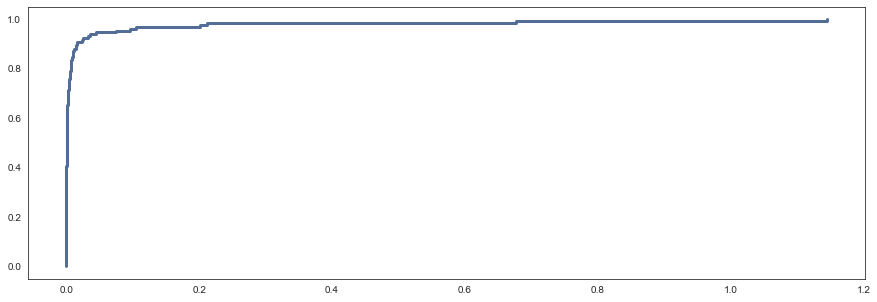

In [122]:
cdf_capita = thinkstats2.Cdf(df_gdp['GDP_capita'])
thinkplot.Cdf(cdf_capita)

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

In [123]:
df_gdp['Schooling'].describe()

count    133.000000
mean      11.691823
std        3.006460
min        4.018750
25%        9.868750
50%       12.000000
75%       13.725000
max       20.037500
Name: Schooling, dtype: float64

0     8.21250
1    12.13750
2    12.71250
3     8.04375
5    16.50625
Name: Schooling, dtype: float64

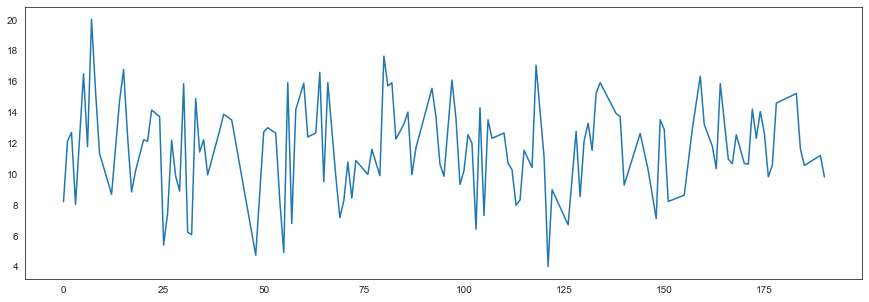

In [124]:
schooling_graph = df_gdp['Schooling']  # delete

plt.plot(df_gdp['Schooling'])
df_gdp['Schooling'].head(5)

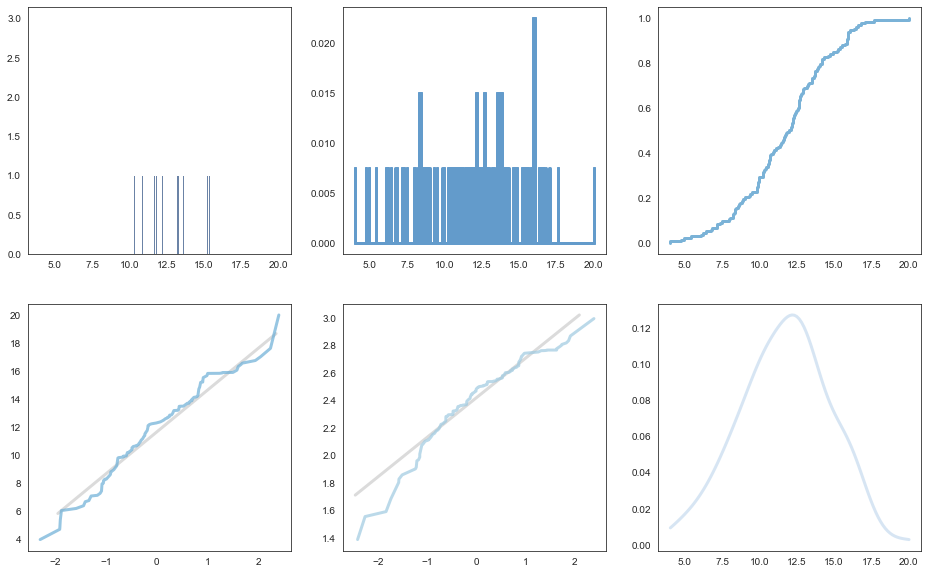

In [125]:
#Analytical for Schooling - 1 
# the schooling data seems more close to normal than GDP capita data.
all_graphs(df_gdp, 'Schooling')

In [126]:
#Analytical for Schooling - 2
# the mean is 11.69 and standard deviation is 3.00, which Schooling values are closer to the average.
# use Schooling data is more accuate than GDP_capita.
df_gdp['Schooling'].describe()

count    133.000000
mean      11.691823
std        3.006460
min        4.018750
25%        9.868750
50%       12.000000
75%       13.725000
max       20.037500
Name: Schooling, dtype: float64

c:\Users\Elsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


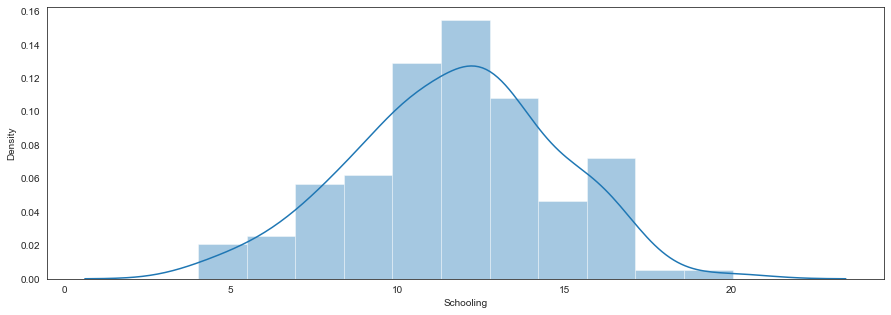

In [127]:
sns.distplot(df_gdp['Schooling'])
plt.show()
sns.set_style('white')

In [128]:
#Get some basic brain stats and save them in varaibles.
#mean, standard dev, median, and count. 
mean_school = df_gdp['Schooling'].mean()
med_school = df_gdp['Schooling'].median()
std_school = df_gdp['Schooling'].std()
num_school = df_gdp['Schooling'].count()

print('mean: ', mean_school)
print('median: ', med_school)
print('std: ', std_school)
print('count: ', num_school)

mean:  11.691823308270681
median:  12.0
std:  3.0064598793967483
count:  133


In [129]:
#Exponential simulator
# a new function for simulator
from sklearn.metrics import mean_squared_error

def simulate_emp(mean = 0, n = 100, m = 10000, ciLow = 5, ciHi = 95):
    means = []
    for j in range(m):
        xs = np.random.exponential(1/mean,n)
        xbar = 1/np.mean(xs)
        means.append(xbar)
    cdf = thinkstats2.Cdf(means)
    ci = cdf.Percentile(ciLow), cdf.Percentile(ciHi)
    rateList = [mean] * m
    stderr = mean_squared_error(means, rateList, squared=False)
    return cdf, ci, stderr

Standard Error: 1.064684370322741
Low CI: 10.02074150727578
Hi CI: 13.46648351984435
Estimate: 11.722722541703236


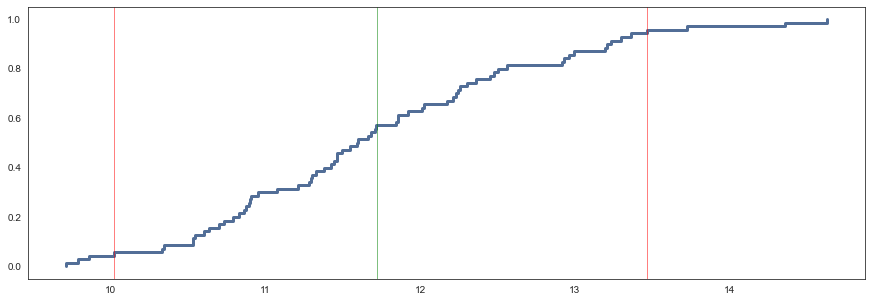

In [130]:
 # emperical data on the same graph as the analytical distribution. 

cdf, ci, stderr = simulate_emp(mean = mean_school, n = num_school, m=70, ciLow=5, ciHi=95)
print("Standard Error:", stderr)
print("Low CI:", ci[0])
print("Hi CI:", ci[1])
print("Estimate:", cdf.Mean())
thinkplot.Cdf(cdf)
thinkplot.axvline(cdf.Mean(), color="green")
thinkplot.axvline(ci[0], color="red")
thinkplot.axvline(ci[1], color="red")

In [131]:
# percentage of schooling level in Canada. 
# schooling people / population


In [132]:
df_gdp['percent_educate'] = df_gdp['Schooling'] / df_gdp['Population'] * 100
print(df_gdp[df_gdp['Country'].isin(['Canada'])])

   Country  isDeveloped  Lifeexpectancy  AdultMortality  infantdeaths  \
30  Canada          0.0         81.6875          64.625           2.0   

     Alcohol  HepatitisB  Measles      BMI  under-fivedeaths    Polio  \
30  8.053333   28.846154    129.5  55.8625               2.0  85.3125   

    Diphtheria           GDP    Population  Schooling  GDP_capita  \
30     91.0625  29382.907523  1.136405e+07     15.875    0.002586   

    GDP_capita2  percent_educate  
30     0.002586          0.00014  


c:\Users\Elsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


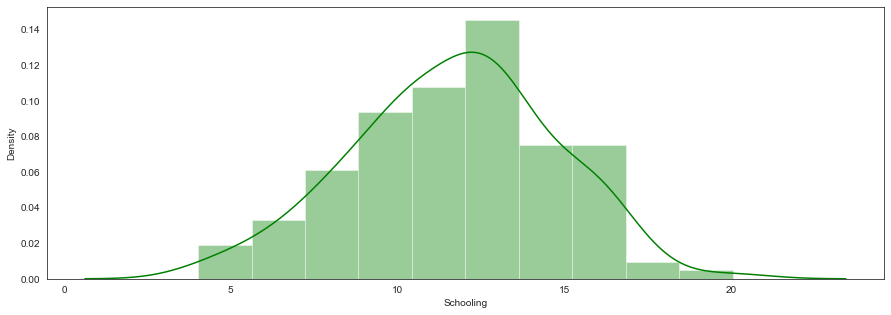

In [133]:
sns.distplot(df_gdp['Schooling'], color = 'green', bins= 10)
plt.show()

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 

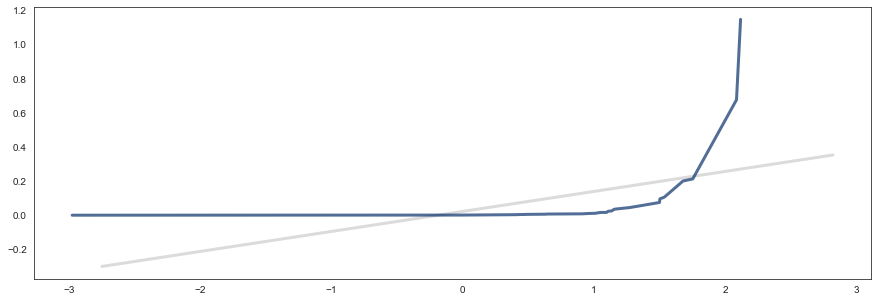

In [136]:
# thinkstats2.NormalProbabilityPlot(cdf_capita)
thinkstats2.NormalProbabilityPlot(df_gdp['GDP_capita2'])

c:\Users\Elsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


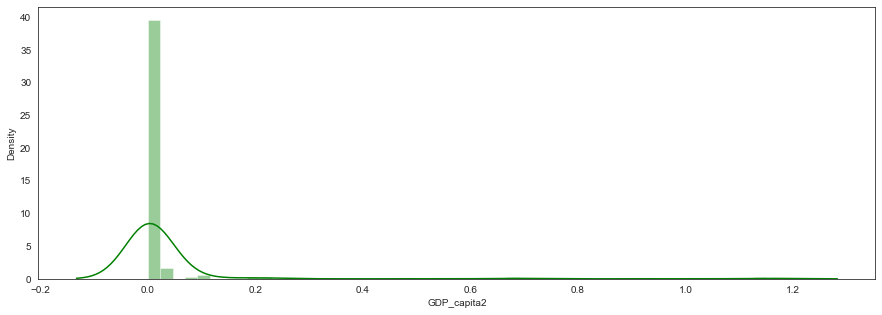

In [140]:
# use another analytical distribution to look at the GDP_capita data.
sns.distplot(df_gdp['GDP_capita2'], color="green")
plt.show()

In [143]:
dfLE = pd.read_csv("led.csv")
drop_cap = df_gdp.drop(columns=['GDP_capita2'])
drop_cap.head()

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_capita,percent_educate
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.375,52.3125,340.015425,9.972260e+06,8.21250,0.000034,0.000082
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.125,98.0625,2119.726679,6.969116e+05,12.13750,0.003042,0.001742
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.750,91.8750,2847.853392,2.164983e+07,12.71250,0.000132,0.000059
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.125,47.6875,1975.143045,1.014710e+07,8.04375,0.000195,0.000079
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.375,92.3750,6998.575103,2.012120e+07,16.50625,0.000348,0.000082
